In [1]:
from os.path import join
from bs4 import BeautifulSoup

DATA_PATH = "data"
files = [
    "BlurbGenreCollection_EN_train.txt",
    "BlurbGenreCollection_EN_dev.txt",
    "BlurbGenreCollection_EN_test.txt"
    ]

blurb_lens = []
for f in files:
    soup = BeautifulSoup(open(join(DATA_PATH, f), "rt").read(), "html.parser")
    for book in soup.findAll("book"):
        book_soup = BeautifulSoup(str(book), "html.parser")
        blurb = str(book_soup.find("body").string)
        blurb_lens.append(len(blurb.split()))

print(sum(blurb_lens)/len(blurb_lens))

156.962478507846


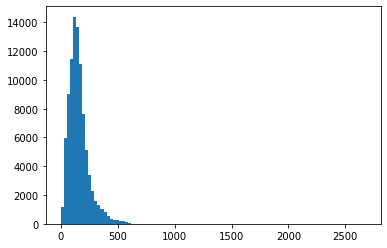

In [2]:
import matplotlib.pyplot as plt

plt.hist(blurb_lens, 100)
plt.show()

In [4]:
def proportion(num):
    over_num = [cnt for cnt in blurb_lens if cnt > num]
    return len(over_num)/len(blurb_lens) * 100

print(proportion(300))
print(proportion(400))
print(proportion(500))
print(proportion(600))

6.86551896750604
2.1981848651707403
0.7149541863451369
0.07182188173330141


In [1]:
from os.path import join
from bs4 import BeautifulSoup
from transformers import BertTokenizer
from tqdm import tqdm

DATA_PATH = "data"

tokenizer = BertTokenizer.from_pretrained(
    join(DATA_PATH, "model_files/bert-base-uncased"), local_files_only=True
)

files = [
    "BlurbGenreCollection_EN_train.txt",
    "BlurbGenreCollection_EN_dev.txt",
    "BlurbGenreCollection_EN_test.txt"
    ]

token_lens = []
for f in files:
    soup = BeautifulSoup(open(join(DATA_PATH, f), "rt").read(), "html.parser")
    for book in tqdm(soup.findAll("book"), desc="Book"):
        book_soup = BeautifulSoup(str(book), "html.parser")
        tokens = tokenizer.tokenize(str(book_soup.find("body").string))
        token_lens.append(len(tokens))

print(sum(token_lens)/len(token_lens))

Book: 100%|██████████| 18394/18394 [01:58<00:00, 155.45it/s]207.717141489107



In [3]:
def proportion(num):
    over_num = [cnt for cnt in token_lens if cnt > num]
    return len(over_num)/len(token_lens) * 100

print(proportion(300))
print(proportion(350))
print(proportion(384))
print(proportion(400))
print(proportion(500))
print(proportion(600))

16.114218556162534
10.212853940409602
7.712146603695562
6.802402768407077
3.098134807495593
1.313469867455982
